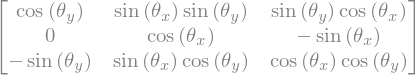

In [7]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.mechanics import dynamicsymbols, init_vprinting, msubs

init_printing()
init_vprinting()

theta, theta1, theta2, theta3, theta4, theta5 = symbols('theta theta_1 theta_2 theta_3 theta_4 theta_5', cls=Function)

theta_x, theta_y, theta_z, x_d, y_d, z_d, t = symbols('theta_x theta_y theta_z x_d y_d z_d, t')

theta1_dot, theta2_dot, theta3_dot, theta4_dot, theta5_dot = symbols('thetadot1 thetadot2 thetadot3 thetadot4 thetadot5', cls=Function)

R_z = Matrix([[cos(theta_z), -sin(theta_z), 0],
              [sin(theta_z), cos(theta_z), 0],
              [0, 0, 1]])

R_y = Matrix([[cos(theta_y), 0, sin(theta_y)],
              [0, 1, 0],
              [-sin(theta_y), 0, cos(theta_y)]])

R_x = Matrix([[1, 0, 0],
              [0, cos(theta_x), -sin(theta_x)],
              [0, sin(theta_x), cos(theta_x)]])

R_z_y = R_z * R_y
R_z_y

R_y_x = R_y * R_x
R_y_x

In [12]:
#Transformation from Hip axis 3 to to Hip axis 2 frame
R01_raw = Matrix([[0, 1, 0],
                  [0, 0, 1],
                  [1, 0, 0]])

R01_theta1 = Matrix([[cos(theta1(t)), -sin(theta1(t)), 0],
                     [sin(theta1(t)), cos(theta1(t)), 0],
                     [0, 0, 1]])

R01 = R01_theta1 * R01_raw

R12_raw = Matrix([[0, 0, 1],
                  [0, 1, 0],
                  [-1, 0, 0]])

R12_theta2 = Matrix([[cos(theta2(t)), 0, sin(theta2(t))],
                     [0, 1, 0],
                     [-sin(theta2(t)), 0, cos(theta2(t))]])

R12 = R12_theta2 * R12_raw

R23_raw = Matrix([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])

R23_theta3 = Matrix([[1, 0, 0],
                     [0, cos(theta3(t)), -sin(theta3(t))],
                     [0, sin(theta3(t)), cos(theta3(t))]])

R23 = R23_theta3 * R23_raw


R34_raw = Matrix([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])

R34_theta4 = Matrix([[1, 0, 0],
                     [0, cos(theta4(t)), -sin(theta4(t))],
                     [0, sin(theta4(t)), cos(theta4(t))]])

R34 = R34_theta4 * R34_raw


#Transformation from Ankle to end-effector/foot_base frame
R45_raw = Matrix([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])

R45_theta5 = Matrix([[1, 0, 0],
                     [0, cos(theta5(t)), -sin(theta5(t))],
                     [0, sin(theta5(t)), cos(theta5(t))]])

R45 = R45_theta5 * R45_raw 

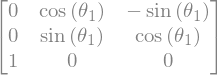

In [16]:
R01

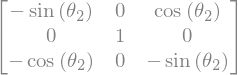

In [17]:
R12

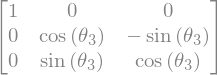

In [18]:
R23

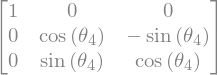

In [19]:
R34

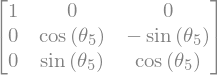

In [20]:
R45

In [21]:
##THESE HAVE TO BE UPDATED ACCORDING TO THE ROTATION MATRICES ABOVE!##
l1 = l2 = 0.145
l3 = 0.41
l4 = 0.375
l5 = 0.04

#Commented out to avoid accidentally interchanging Hxx_simple and Hxx

# H01 = Matrix([[0, cos(theta1), -sin(theta1), 0],
#               [0, sin(theta1), cos(theta1), 0],
#               [1, 0, 0, -l1],
#               [0, 0, 0, 1]])

# H12 = Matrix([[-sin(theta2), 0, cos(theta2), -l2],
#               [0, 1, 0, 0],
#               [-cos(theta2), 0, -sin(theta2), 0],
#               [0, 0, 0, 1]])

# H23 = Matrix([[1, 0, 0, 0],
#               [0, cos(theta3), -sin(theta3), 0],
#               [0, sin(theta3), cos(theta3), -l3],
#               [0, 0, 0, 1]])

# H34 = Matrix([[1, 0, 0, 0],
#               [0, cos(theta4), -sin(theta4), 0],
#               [0, sin(theta4), cos(theta4), -l4],
#               [0, 0, 0, 1]])

# H45 = Matrix([[1, 0, 0, 0],
#               [0, cos(theta5), -sin(theta5), 0],
#               [0, sin(theta5), cos(theta5), -l5],
#               [0, 0, 0, 1]])

# H05 = H01 * H12 * H23 * H34 * H45
# print("Simplified H05:")
# simplify(H05)

In [9]:
#H05_subs_1 = H05.subs({theta1:0, theta2:0, theta3:0, theta4:0, theta5:1.5})
#H05_subs_1

In [10]:
#p5 = Matrix([0, 0, 0, 1])
#H05_subs_1 * p5

In [11]:
#cos(theta5) * l5 = y
#sin(theta1) * l5 = x

#ankle_pos = Matrix([[0],
#                    [sin(theta5) * l5],
#                    [cos(theta5) * l5],
#                    [1]])

#simplify(H05 * ankle_pos)

In [12]:
# x_pos = -0.375 * sin(theta1) * sin(theta2) * cos(theta3) - 0.41 * sin(theta1) * sin(theta2) + 0.375 * sin(theta3) * cos(theta1)
# y_pos = 0.375 * sin(theta1)*sin(theta3) + 0.375 * sin(theta2) * cos(theta1) * cos(theta3) + 0.41 * sin(theta2) * cos(theta1)
# z_pos = -0.375 * cos(theta2) * cos(theta3) - 0.41 * cos(theta2) -0.29

# dx_theta1 = simplify(diff(x_pos, theta1))
# dx_theta2 = simplify(diff(x_pos, theta2))
# dx_theta3 = simplify(diff(x_pos, theta3))
# dx_theta4 = simplify(diff(x_pos, theta4))
# dx_theta5 = simplify(diff(x_pos, theta5))

# dy_theta1 = simplify(diff(y_pos, theta1))
# dy_theta2 = simplify(diff(y_pos, theta2))
# dy_theta3 = simplify(diff(y_pos, theta3))
# dy_theta4 = simplify(diff(y_pos, theta4))
# dy_theta5 = simplify(diff(y_pos, theta5))

# dz_theta1 = simplify(diff(z_pos, theta1))
# dz_theta2 = simplify(diff(z_pos, theta2))
# dz_theta3 = simplify(diff(z_pos, theta3))
# dz_theta4 = simplify(diff(z_pos, theta4))
# dz_theta5 = simplify(diff(z_pos, theta5))


In [13]:
#dx_theta4

In [14]:
#dy_theta4

In [15]:
#dz_theta4

Simplified H05 with all the same frames:


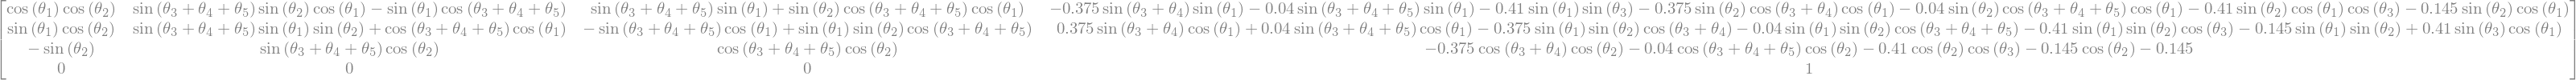

In [22]:
H01_simple = Matrix([[cos(theta1(t)), -sin(theta1(t)), 0, 0],
                     [sin(theta1(t)), cos(theta1(t)), 0, 0],
                     [0, 0, 1, -l1],
                     [0, 0, 0, 1]])

H12_simple = Matrix([[cos(theta2(t)), 0, sin(theta2(t)), -l2 * sin(theta2(t))],
                     [0, 1, 0, 0],
                     [-sin(theta2(t)), 0, cos(theta2(t)), -l2 * cos(theta2(t))],
                     [0, 0, 0, 1]])

H23_simple = Matrix([[1, 0, 0, 0],
                     [0, cos(theta3(t)), -sin(theta3(t)), l3 * sin(theta3(t))],
                     [0, sin(theta3(t)), cos(theta3(t)), -l3 * cos(theta3(t))],
                     [0, 0, 0, 1]])

H34_simple = Matrix([[1, 0, 0, 0],
                     [0, cos(theta4(t)), -sin(theta4(t)), l4 * sin(theta4(t))],
                     [0, sin(theta4(t)), cos(theta4(t)), -l4 * cos(theta4(t))],
                     [0, 0, 0, 1]])

H45_simple = Matrix([[1, 0, 0, 0],
                     [0, cos(theta5(t)), -sin(theta5(t)), l5 * sin(theta5(t))],
                     [0, sin(theta5(t)), cos(theta5(t)), -l5 * cos(theta5(t))],
                     [0, 0, 0, 1]])

H05_simple = H01_simple * H12_simple * H23_simple * H34_simple * H45_simple
print("Simplified H05 with all the same frames:")
simplify(H05_simple)

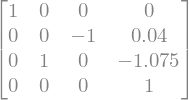

In [24]:
H05_simple_subs = H05_simple.subs({theta1(t):0, theta2(t):0, theta3(t):0, theta4(t):0, theta5(t):pi/2})
H05_simple_subs

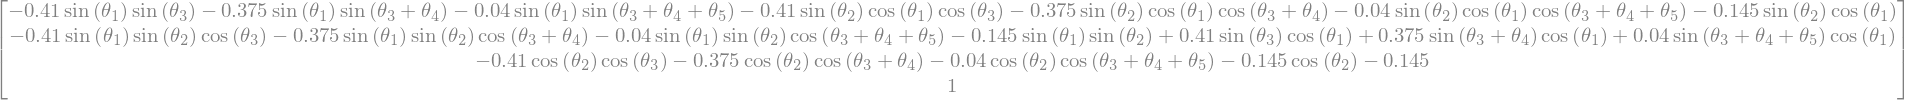

In [18]:
simplify(H05_simple * Matrix([0, 0, 0, 1]))

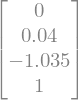

In [25]:
H05_simple_subs * Matrix([0, sin(pi/2) * l5, cos(pi/2) * l5, 1])

In [26]:
#cos(theta5) * l5 = y
#sin(theta1) * l5 = x

#ankle_pos = Matrix([0, sin(theta5) * l5, cos(theta5) * l5, 1])

#Extract the (symbolic) position of the H05 matrix
simplify(H05_simple * Matrix([0, 0, 0, 1])).row(2)

In [28]:
x_pos_simple = -0.41 * sin(theta1(t)) * sin(theta3(t)) - 0.375 * sin(theta1(t)) * sin(theta3(t) + theta4(t)) - 0.04 * sin(theta1(t)) * sin(theta3(t) + theta4(t) + theta5(t)) - 0.41 * sin(theta2(t)) * cos(theta1(t))* cos(theta3(t)) - 0.375 * sin(theta2(t)) * cos(theta1(t)) * cos(theta3(t) + theta4(t)) - 0.04 * sin(theta2(t)) * cos(theta1(t)) * cos(theta3(t) + theta4(t) + theta5(t)) - 0.145 * sin(theta2(t)) * cos(theta1(t))
y_pos_simple = -0.41 * sin(theta1(t)) * sin(theta2(t)) * cos(theta3(t)) - 0.375 * sin(theta1(t)) * sin(theta2(t)) * cos(theta3(t) + theta4(t)) - 0.04 * sin(theta1(t)) * sin(theta2(t)) * cos(theta3(t) + theta4(t) + theta5(t)) - 0.145 * sin(theta1(t)) * sin(theta2(t)) + 0.41 * sin(theta3(t)) * cos(theta1(t)) + 0.375 * sin(theta3(t) + theta4(t)) * cos(theta1(t)) + 0.04 * sin(theta3(t) + theta4(t) + theta5(t)) * cos(theta1(t))
z_pos_simple = -0.41 * cos(theta2(t)) * cos(theta3(t)) - 0.375 * cos(theta2(t)) * cos(theta3(t) + theta4(t)) - 0.04 * cos(theta2(t)) * cos(theta3(t) + theta4(t) + theta5(t)) - 0.145 * cos(theta2(t)) - 0.145

dx_theta1_simple = simplify(diff(x_pos_simple, theta1(t)))
dx_theta2_simple = simplify(diff(x_pos_simple, theta2(t)))
dx_theta3_simple = simplify(diff(x_pos_simple, theta3(t)))
dx_theta4_simple = simplify(diff(x_pos_simple, theta4(t)))
dx_theta5_simple = simplify(diff(x_pos_simple, theta5(t)))

dy_theta1_simple = simplify(diff(y_pos_simple, theta1(t)))
dy_theta2_simple = simplify(diff(y_pos_simple, theta2(t)))
dy_theta3_simple = simplify(diff(y_pos_simple, theta3(t)))
dy_theta4_simple = simplify(diff(y_pos_simple, theta4(t)))
dy_theta5_simple = simplify(diff(y_pos_simple, theta5(t)))

dz_theta1_simple = simplify(diff(z_pos_simple, theta1(t)))
dz_theta2_simple = simplify(diff(z_pos_simple, theta2(t)))
dz_theta3_simple = simplify(diff(z_pos_simple, theta3(t)))
dz_theta4_simple = simplify(diff(z_pos_simple, theta4(t)))
dz_theta5_simple = simplify(diff(z_pos_simple, theta5(t)))

In [22]:
#This never finishes solving :(
if False:
    simplify(nonlinsolve([-0.41 * sin(theta1) * sin(theta3) - 0.375 * sin(theta1) * sin(theta3 + theta4) - 0.04 * sin(theta1) * sin(theta3 + theta4 + theta5) - 0.41 * sin(theta2) * cos(theta1)* cos(theta3) - 0.375 * sin(theta2) * cos(theta1) * cos(theta3 + theta4) - 0.04 * sin(theta2) * cos(theta1) * cos(theta3 + theta4 + theta5) - 0.145 * sin(theta2) * cos(theta1) - x_d
                          -0.41 * sin(theta1) * sin(theta2) * cos(theta3) - 0.375 * sin(theta1) * sin(theta2) * cos(theta3 + theta4) - 0.04 * sin(theta1) * sin(theta2) * cos(theta3 + theta4 + theta5) - 0.145 * sin(theta1) * sin(theta2) + 0.41 * sin(theta3) * cos(theta1) + 0.375 * sin(theta3 + theta4) * cos(theta1) + 0.04 * sin(theta3 + theta4 + theta5) * cos(theta1) - y_d,
                          -0.41 * cos(theta2) * cos(theta3) - 0.375 * cos(theta2) * cos(theta3 + theta4) - 0.04 * cos(theta2) * cos(theta3 + theta4 + theta5) - 0.145 * cos(theta2) - 0.145 - z_d],
                         [theta1, theta2, theta3, theta4, theta5]))

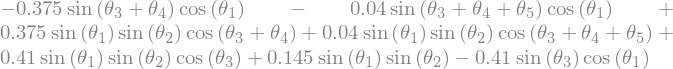

In [29]:
dx_theta1_simple

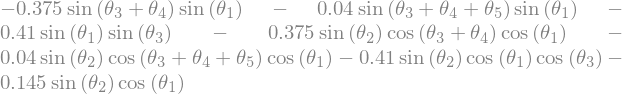

In [30]:
dy_theta1_simple

In [31]:
dz_theta1_simple

In [32]:
dx_theta2_simple


In [33]:
dy_theta2_simple

In [34]:
dz_theta2_simple

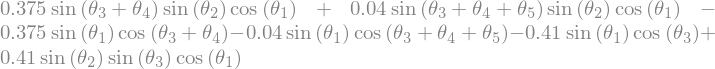

In [35]:
dx_theta3_simple

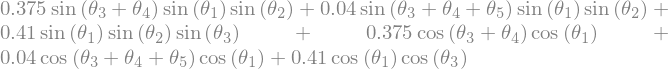

In [36]:
dy_theta3_simple

In [37]:
dz_theta3_simple

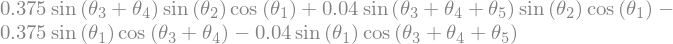

In [38]:
dx_theta4_simple

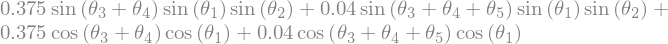

In [39]:
dy_theta4_simple

In [40]:
dz_theta4_simple

In [41]:
dx_theta5_simple

In [42]:
dy_theta5_simple

In [43]:
dz_theta5_simple

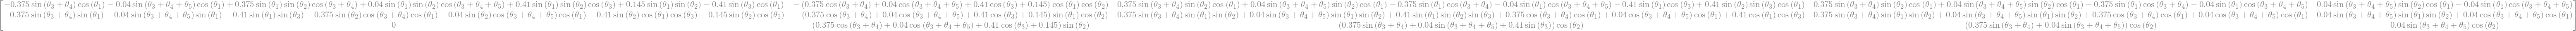

In [44]:
J = Matrix([[dx_theta1_simple, dx_theta2_simple, dx_theta3_simple, dx_theta4_simple, dx_theta5_simple],
            [dy_theta1_simple, dy_theta2_simple, dy_theta3_simple, dy_theta4_simple, dy_theta5_simple],
            [dz_theta1_simple, dz_theta2_simple, dz_theta3_simple, dz_theta4_simple, dz_theta5_simple]])
J

Simplified H05_com with all the same frames:


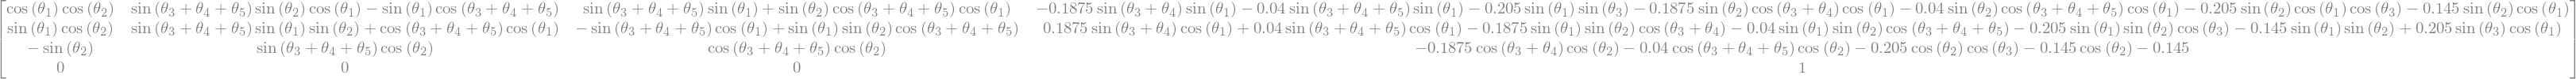

In [45]:
# To get the EOM, calculate kinetic and potential energy of system by adding energy from each link.
# This is done by extracting the position of the links from the Transformation matrices.
# It's important to note that all this should be done for the frames being placed at the COM of each link.
# This only makes sense if the mass is significant and the COM makes sense (i.e. not for hips bc center of mass is at hip center)

H01_com = Matrix([[cos(theta1(t)), -sin(theta1(t)), 0, 0],
                 [sin(theta1(t)), cos(theta1(t)), 0, 0],
                 [0, 0, 1, -l1],
                 [0, 0, 0, 1]])

H12_com = Matrix([[cos(theta2(t)), 0, sin(theta2(t)), -l2 * sin(theta2(t))],
                 [0, 1, 0, 0],
                 [-sin(theta2(t)), 0, cos(theta2(t)), -l2 * cos(theta2(t))],
                 [0, 0, 0, 1]])

H23_com = Matrix([[1, 0, 0, 0],
                 [0, cos(theta3(t)), -sin(theta3(t)), 0.5 * l3 * sin(theta3(t))],
                 [0, sin(theta3(t)), cos(theta3(t)), 0.5 * -l3 * cos(theta3(t))],
                 [0, 0, 0, 1]])

H34_com = Matrix([[1, 0, 0, 0],
                 [0, cos(theta4(t)), -sin(theta4(t)), 0.5 * l4 * sin(theta4(t))],
                 [0, sin(theta4(t)), cos(theta4(t)), 0.5 * -l4 * cos(theta4(t))],
                 [0, 0, 0, 1]])

#Maybe 0.5 here as well...
H45_com = Matrix([[1, 0, 0, 0],
                 [0, cos(theta5(t)), -sin(theta5(t)), l5 * sin(theta5(t))],
                 [0, sin(theta5(t)), cos(theta5(t)), -l5 * cos(theta5(t))],
                 [0, 0, 0, 1]])

H05_com = H01_com * H12_com * H23_com * H34_com * H45_com
print("Simplified H05_com with all the same frames:")
simplify(H05_com)

In [57]:
# Now calculate the positions for each link and differentiate these equations 
# to get the linear velocities which can be plugged into the kinetic energy equation.
# v**2 would be (x_dot**2 + y_dot**2 + z_dot**2) then as the magnitude of a vector is sqrt(x**2 + y**2 + z**2)

p = Matrix([0, 0 , 0, 1])

hip_axis_2_com_pos = simplify(H01_com * p)
hip_axis_2_com_vel = simplify(diff(hip_axis_2_com_pos, t))

# To get the derivatives, differentiate with respect to each angle and multiply the result with theta_x_dot(t)

hip_axis_1_com_pos = simplify(H01_com * H12_com * p)
hip_axis_1_com_vel = simplify(diff(hip_axis_1_com_pos, t))

upper_leg_com_pos = simplify(H01_com * H12_com * H23_com * p)
upper_leg_com_vel = simplify(diff(upper_leg_com_pos, t))

lower_leg_com_pos = simplify(H01_com * H12_com * H23_com * H34_com * p)
lower_leg_com_vel = simplify(diff(lower_leg_com_pos, t))

foot_com_pos = simplify(H01_com * H12_com * H23_com * H34_com * H45_com * p)
foot_com_vel = simplify(diff(foot_com_pos, t))

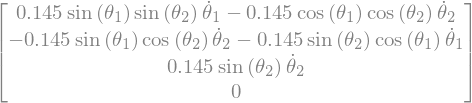

In [58]:
hip_axis_1_com_vel

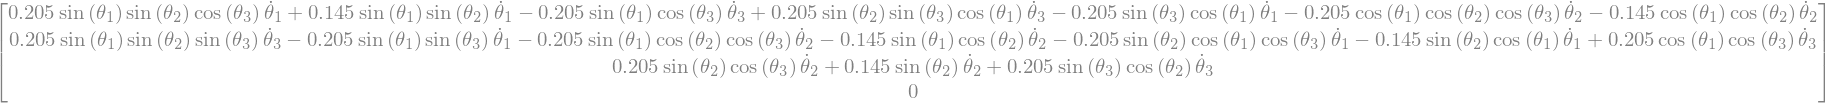

In [59]:
upper_leg_com_vel

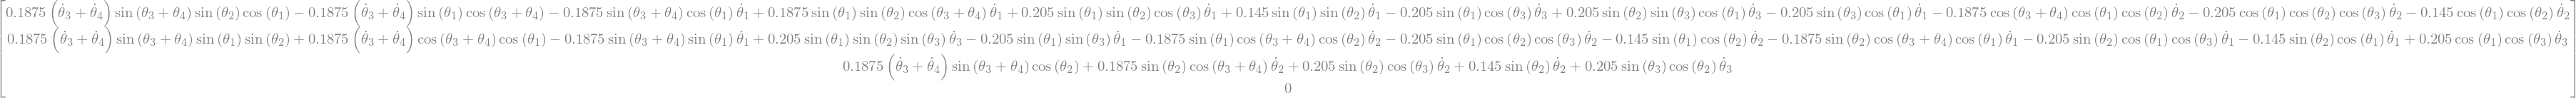

In [60]:
lower_leg_com_vel

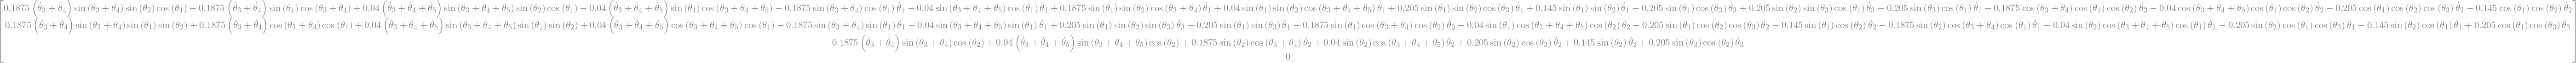

In [61]:
foot_com_vel

In [62]:
m_hip_axis_3 = m_hip_axis_2 = m_hip_axis_1 = m_upper_leg = m_lower_leg = 0.05
m_foot = 0.01

g = 9.81

In [63]:
#T = Kinetic energy
#U = Potential energy

T_hip_axis_2 = 0.5 * m_hip_axis_2 * (hip_axis_2_com_vel.row(0)**2 + hip_axis_2_com_vel.row(1)**2 + hip_axis_2_com_vel.row(2)**2)
T_hip_axis_1 = 0.5 * m_hip_axis_1 * (hip_axis_1_com_vel.row(0)**2 + hip_axis_1_com_vel.row(1)**2 + hip_axis_1_com_vel.row(2)**2)
T_upper_leg = 0.5 * m_upper_leg * (upper_leg_com_vel.row(0)**2 + upper_leg_com_vel.row(1)**2 + upper_leg_com_vel.row(2)**2)
T_lower_leg = 0.5 * m_lower_leg * (lower_leg_com_vel.row(1)**2 + lower_leg_com_vel.row(1)**2 + lower_leg_com_vel.row(2)**2)
T_foot = 0.5 * m_foot * (foot_com_vel.row(1)**2 + foot_com_vel.row(1)**2 + foot_com_vel.row(2)**2)

T_total = T_hip_axis_2 + T_hip_axis_1 + T_upper_leg + T_lower_leg + T_foot

U_hip_axis_2 = m_hip_axis_2 * g * hip_axis_2_com_pos.row(2)
U_hip_axis_1 = m_hip_axis_1 * g * hip_axis_1_com_pos.row(2)
U_upper_leg = m_upper_leg * g * upper_leg_com_pos.row(2)
U_lower_leg = m_lower_leg * g * lower_leg_com_pos.row(2)
U_foot = m_foot * g * foot_com_pos.row(2)

U_total = U_hip_axis_2 + U_hip_axis_1 + U_upper_leg + U_lower_leg + U_foot

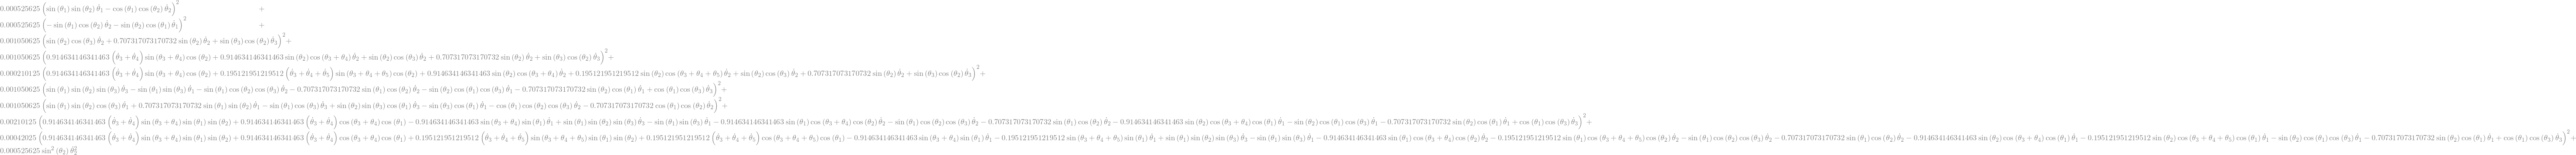

In [64]:
T_total[0]

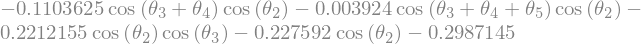

In [65]:
U_total[0]

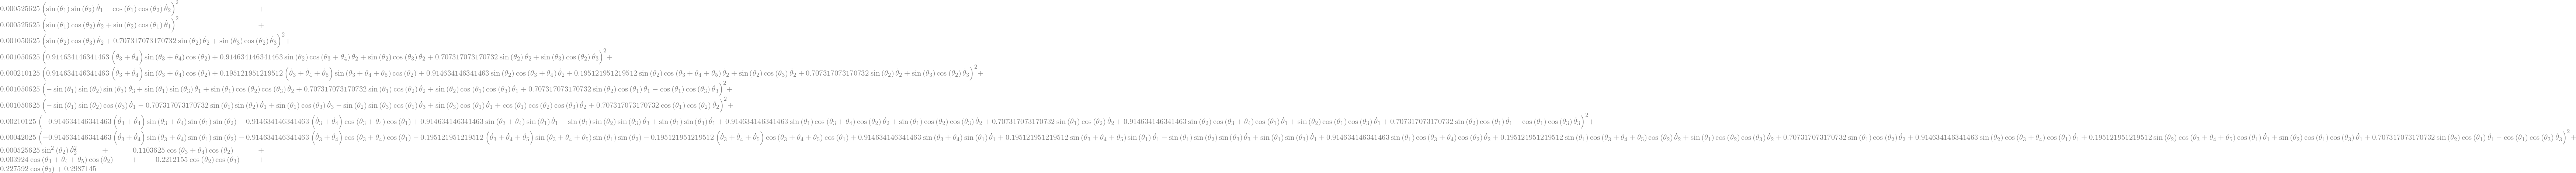

In [66]:
L = simplify(T_total[0] - U_total[0])
L

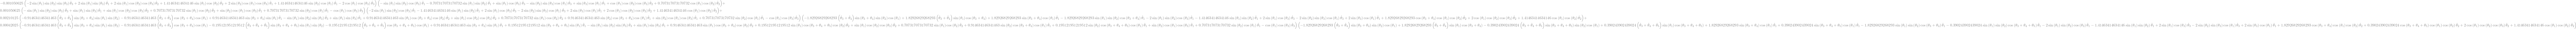

In [71]:
df_theta1 = simplify(diff(L, theta1(t)))
df_theta1

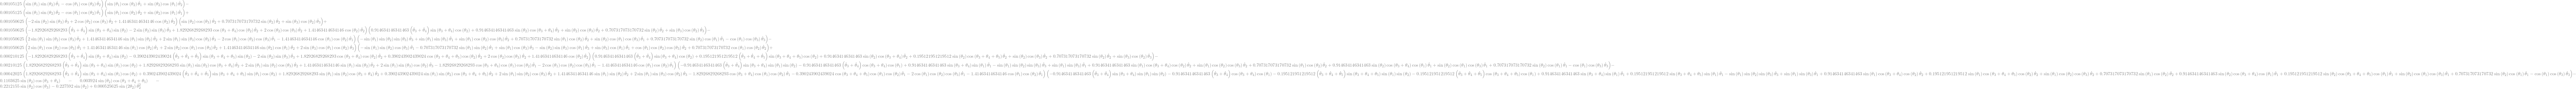

In [72]:
df_theta2 = simplify(diff(L, theta2(t)))
df_theta2

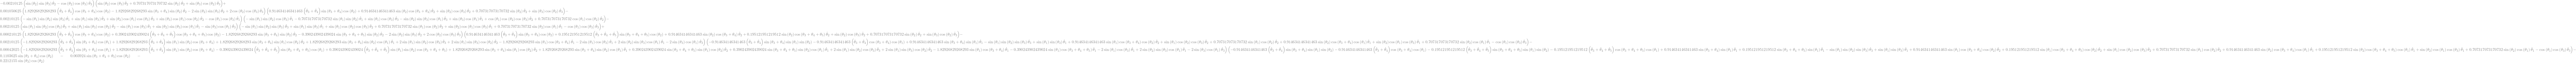

In [73]:
df_theta3 = simplify(diff(L, theta3(t)))
df_theta3

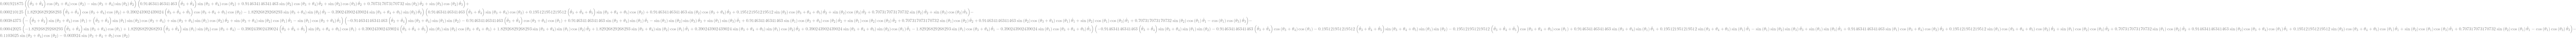

In [74]:
df_theta4 = simplify(diff(L, theta4(t)))
df_theta4

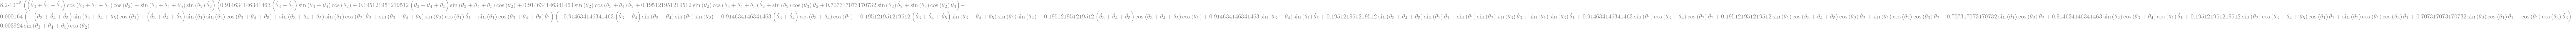

In [75]:
df_theta5 = simplify(diff(L, theta5(t)))
df_theta5

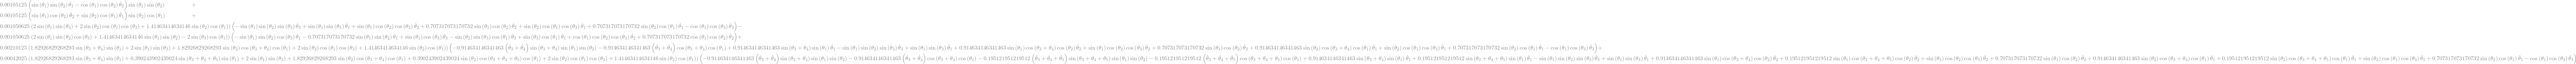

In [86]:
#Differentiate theta1(t) to get theta1_dot(t) as the predefined symbol does not seem to work
df_theta1_dot = simplify(diff(L, diff(theta1(t))))
df_theta1_dot

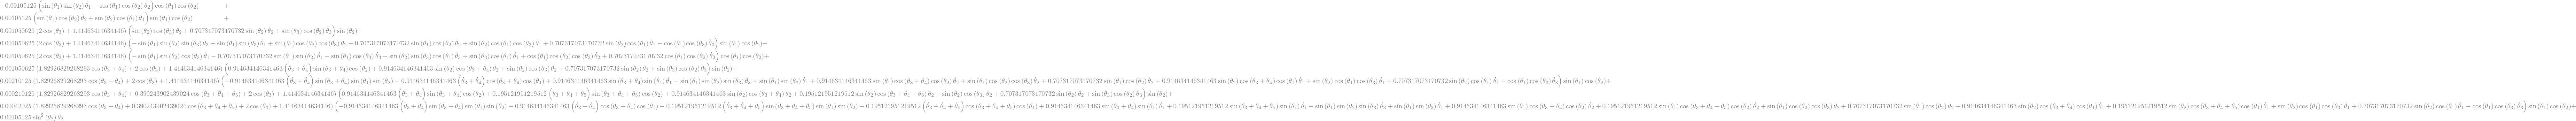

In [87]:
df_theta2_dot = simplify(diff(L, diff(theta2(t))))
df_theta2_dot

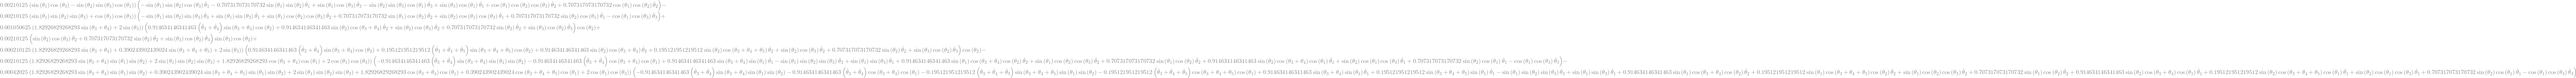

In [88]:
df_theta3_dot = simplify(diff(L, diff(theta3(t))))
df_theta3_dot

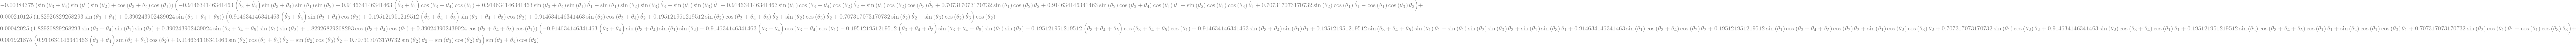

In [89]:
df_theta4_dot = simplify(diff(L, diff(theta4(t))))
df_theta4_dot

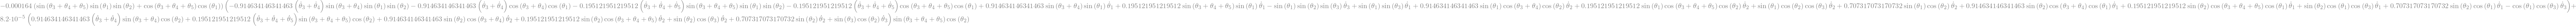

In [90]:
df_theta5_dot = simplify(diff(L, diff(theta5(t))))
df_theta5_dot

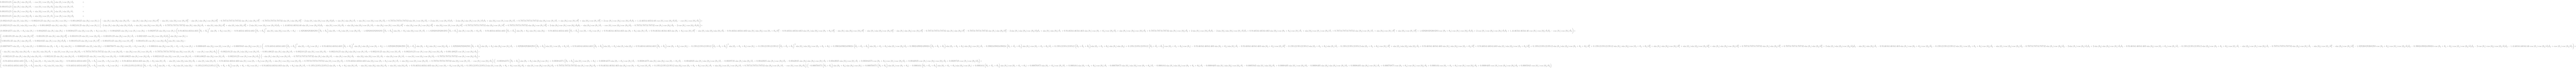

In [91]:
df_t1 = simplify(diff(df_theta1_dot, t))
df_t1

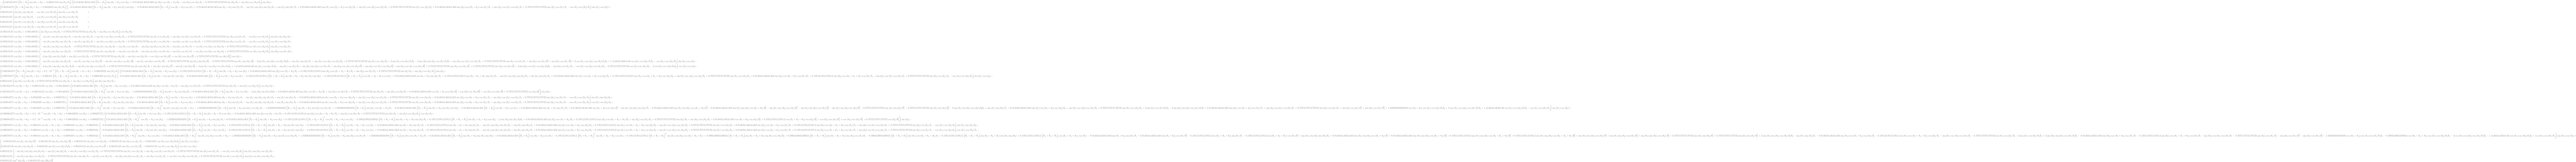

In [92]:
df_t2 = simplify(diff(df_theta2_dot, t))
df_t2

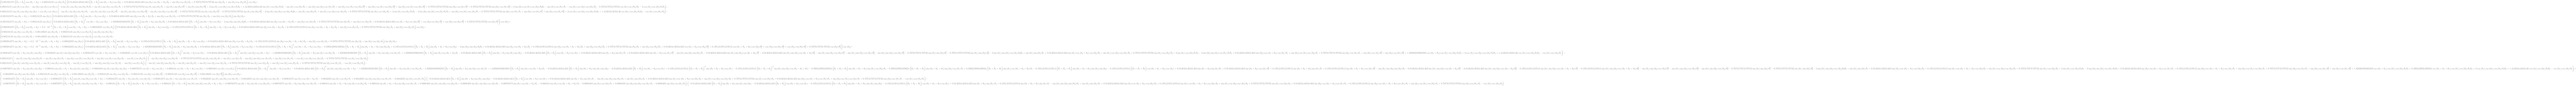

In [93]:
df_t3 = simplify(diff(df_theta3_dot, t))
df_t3

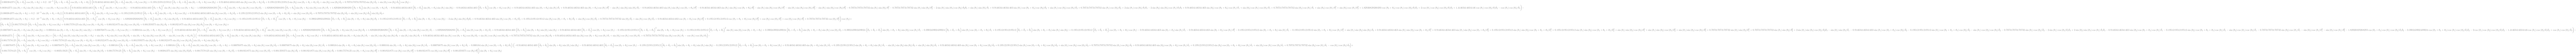

In [94]:
df_t4 = simplify(diff(df_theta4_dot, t))
df_t4

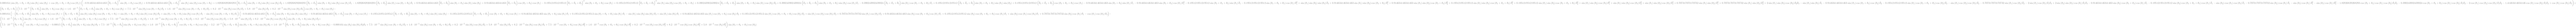

In [96]:
df_t5 = simplify(diff(df_theta5_dot, t))
df_t5